In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

In [5]:
file = './telecom_sample.csv'
df = pd.read_csv(file)
df.head()

,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,Contract,Churn
0,1,Female,55,2,111.22,6956.08,Month-to-month,No
1,2,Male,33,21,75.53,5692.23,Month-to-month,Yes
2,3,Female,30,51,94.74,4839.18,Month-to-month,No
3,4,Female,20,5,75.43,6706.95,Month-to-month,No
4,5,Male,53,47,70.88,3958.48,Month-to-month,Yes


In [6]:
df.shape

(1000, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      1000 non-null   int64  
 1   Gender          1000 non-null   object 
 2   Age             1000 non-null   int64  
 3   Tenure          1000 non-null   int64  
 4   MonthlyCharges  1000 non-null   float64
 5   TotalCharges    1000 non-null   float64
 6   Contract        1000 non-null   object 
 7   Churn           1000 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [8]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,44.389000,36.177000,69.964070,4008.533290
std,288.819436,15.147644,20.879646,29.060833,2247.583387
min,1.000000,18.000000,1.000000,20.190000,110.990000
25%,250.750000,31.000000,18.000000,44.477500,2122.635000
50%,500.500000,45.000000,36.000000,71.995000,3870.870000
75%,750.250000,57.000000,55.000000,95.972500,5934.237500
max,1000.000000,70.000000,72.000000,119.820000,7986.780000


In [9]:
df.isnull().sum()

CustomerID        0
Gender            0
Age               0
Tenure            0
MonthlyCharges    0
TotalCharges      0
Contract          0
Churn             0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [12]:
gender_dummies = pd.get_dummies(df.Gender, prefix='Gender')
gender_dummies.head()

,Gender_Female,Gender_Male
0,True,False
1,False,True
2,True,False
3,True,False
4,False,True


In [13]:
df['Gender_Male'] = gender_dummies.Gender_Male
df['Gender_Female'] = gender_dummies.Gender_Female

df.head()

,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,Contract,Churn,Gender_Male,Gender_Female
0,1,Female,55,2,111.22,6956.08,Month-to-month,No,False,True
1,2,Male,33,21,75.53,5692.23,Month-to-month,Yes,True,False
2,3,Female,30,51,94.74,4839.18,Month-to-month,No,False,True
3,4,Female,20,5,75.43,6706.95,Month-to-month,No,False,True
4,5,Male,53,47,70.88,3958.48,Month-to-month,Yes,True,False


In [14]:
df.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [15]:
df['Contract'] = df.Contract.apply(lambda x: 'Month_to_month' if x == 'Month-to-month' else x)
df['Contract'] = df.Contract.apply(lambda x: 'One_year' if x == 'One year' else x)
df['Contract'] = df.Contract.apply(lambda x: 'Two_year' if x == 'Two year' else x)

In [16]:
contract_dummies = pd.get_dummies(df.Contract, prefix='Contract')
contract_dummies.head()

,Contract_Month_to_month,Contract_One_year,Contract_Two_year
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False


In [17]:
df['Contract_Month_to_month'] = contract_dummies.Contract_Month_to_month
df['Contract_One_year'] = contract_dummies.Contract_One_year
df['Contract_Two_year'] = contract_dummies.Contract_Two_year


df.head()

,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,Contract,Churn,Gender_Male,Gender_Female,Contract_Month_to_month,Contract_One_year,Contract_Two_year
0,1,Female,55,2,111.22,6956.08,Month_to_month,No,False,True,True,False,False
1,2,Male,33,21,75.53,5692.23,Month_to_month,Yes,True,False,True,False,False
2,3,Female,30,51,94.74,4839.18,Month_to_month,No,False,True,True,False,False
3,4,Female,20,5,75.43,6706.95,Month_to_month,No,False,True,True,False,False
4,5,Male,53,47,70.88,3958.48,Month_to_month,Yes,True,False,True,False,False


In [18]:
df.drop('Contract', axis=1, inplace=True)

In [19]:
df.Churn.unique(), df.Churn.value_counts()

(array(['No', 'Yes'], dtype=object),
 Churn
 No     513
 Yes    487
 Name: count, dtype: int64)

In [20]:
df['Churn'] = df.Churn.apply(lambda x: 0 if x == 'No' else 1)

In [21]:
df['Gender'] = df.Gender.apply(lambda x: 0 if x == 'Male' else 1)

In [22]:
df.insert(len(df.columns)-1, 'Churn', df.pop('Churn'))

### EDA

Class distribution

<Axes: xlabel='Churn'>

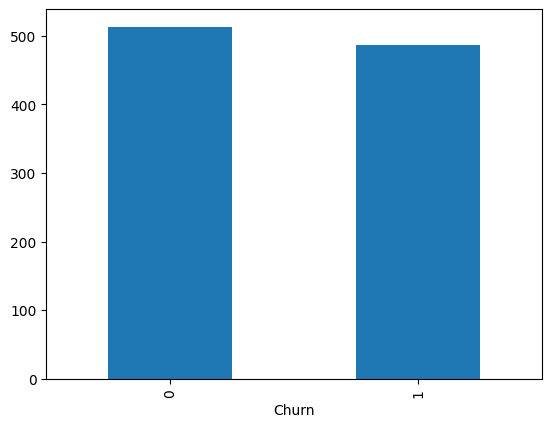

In [23]:
df.Churn.value_counts().plot.bar()

Features

In [24]:
feature_cols = ['Age', 'Tenure', 'MonthlyCharges', 'TotalCharges']

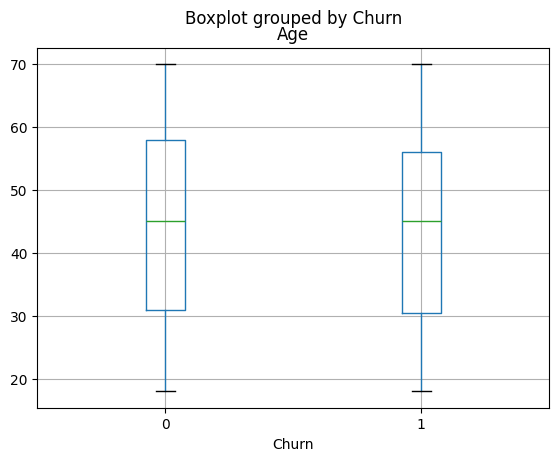

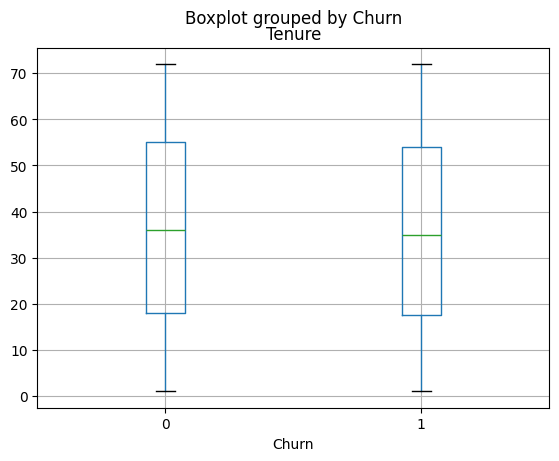

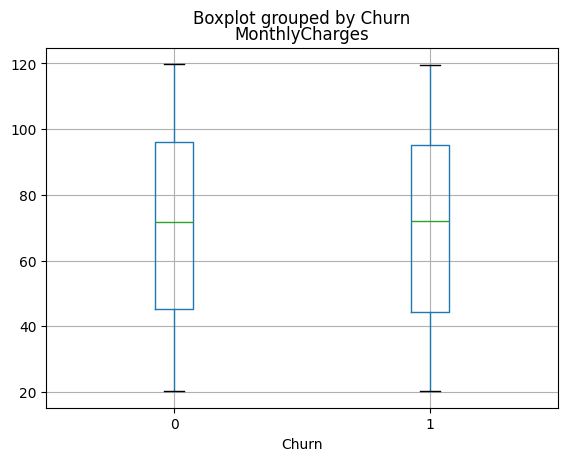

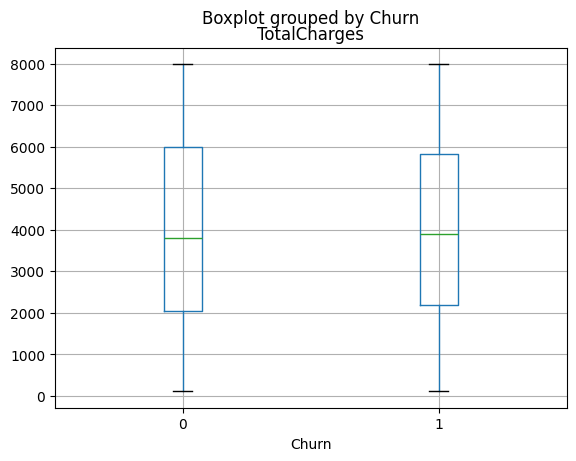

In [25]:
for column_name in feature_cols:
    df.boxplot(column=column_name, by='Churn')

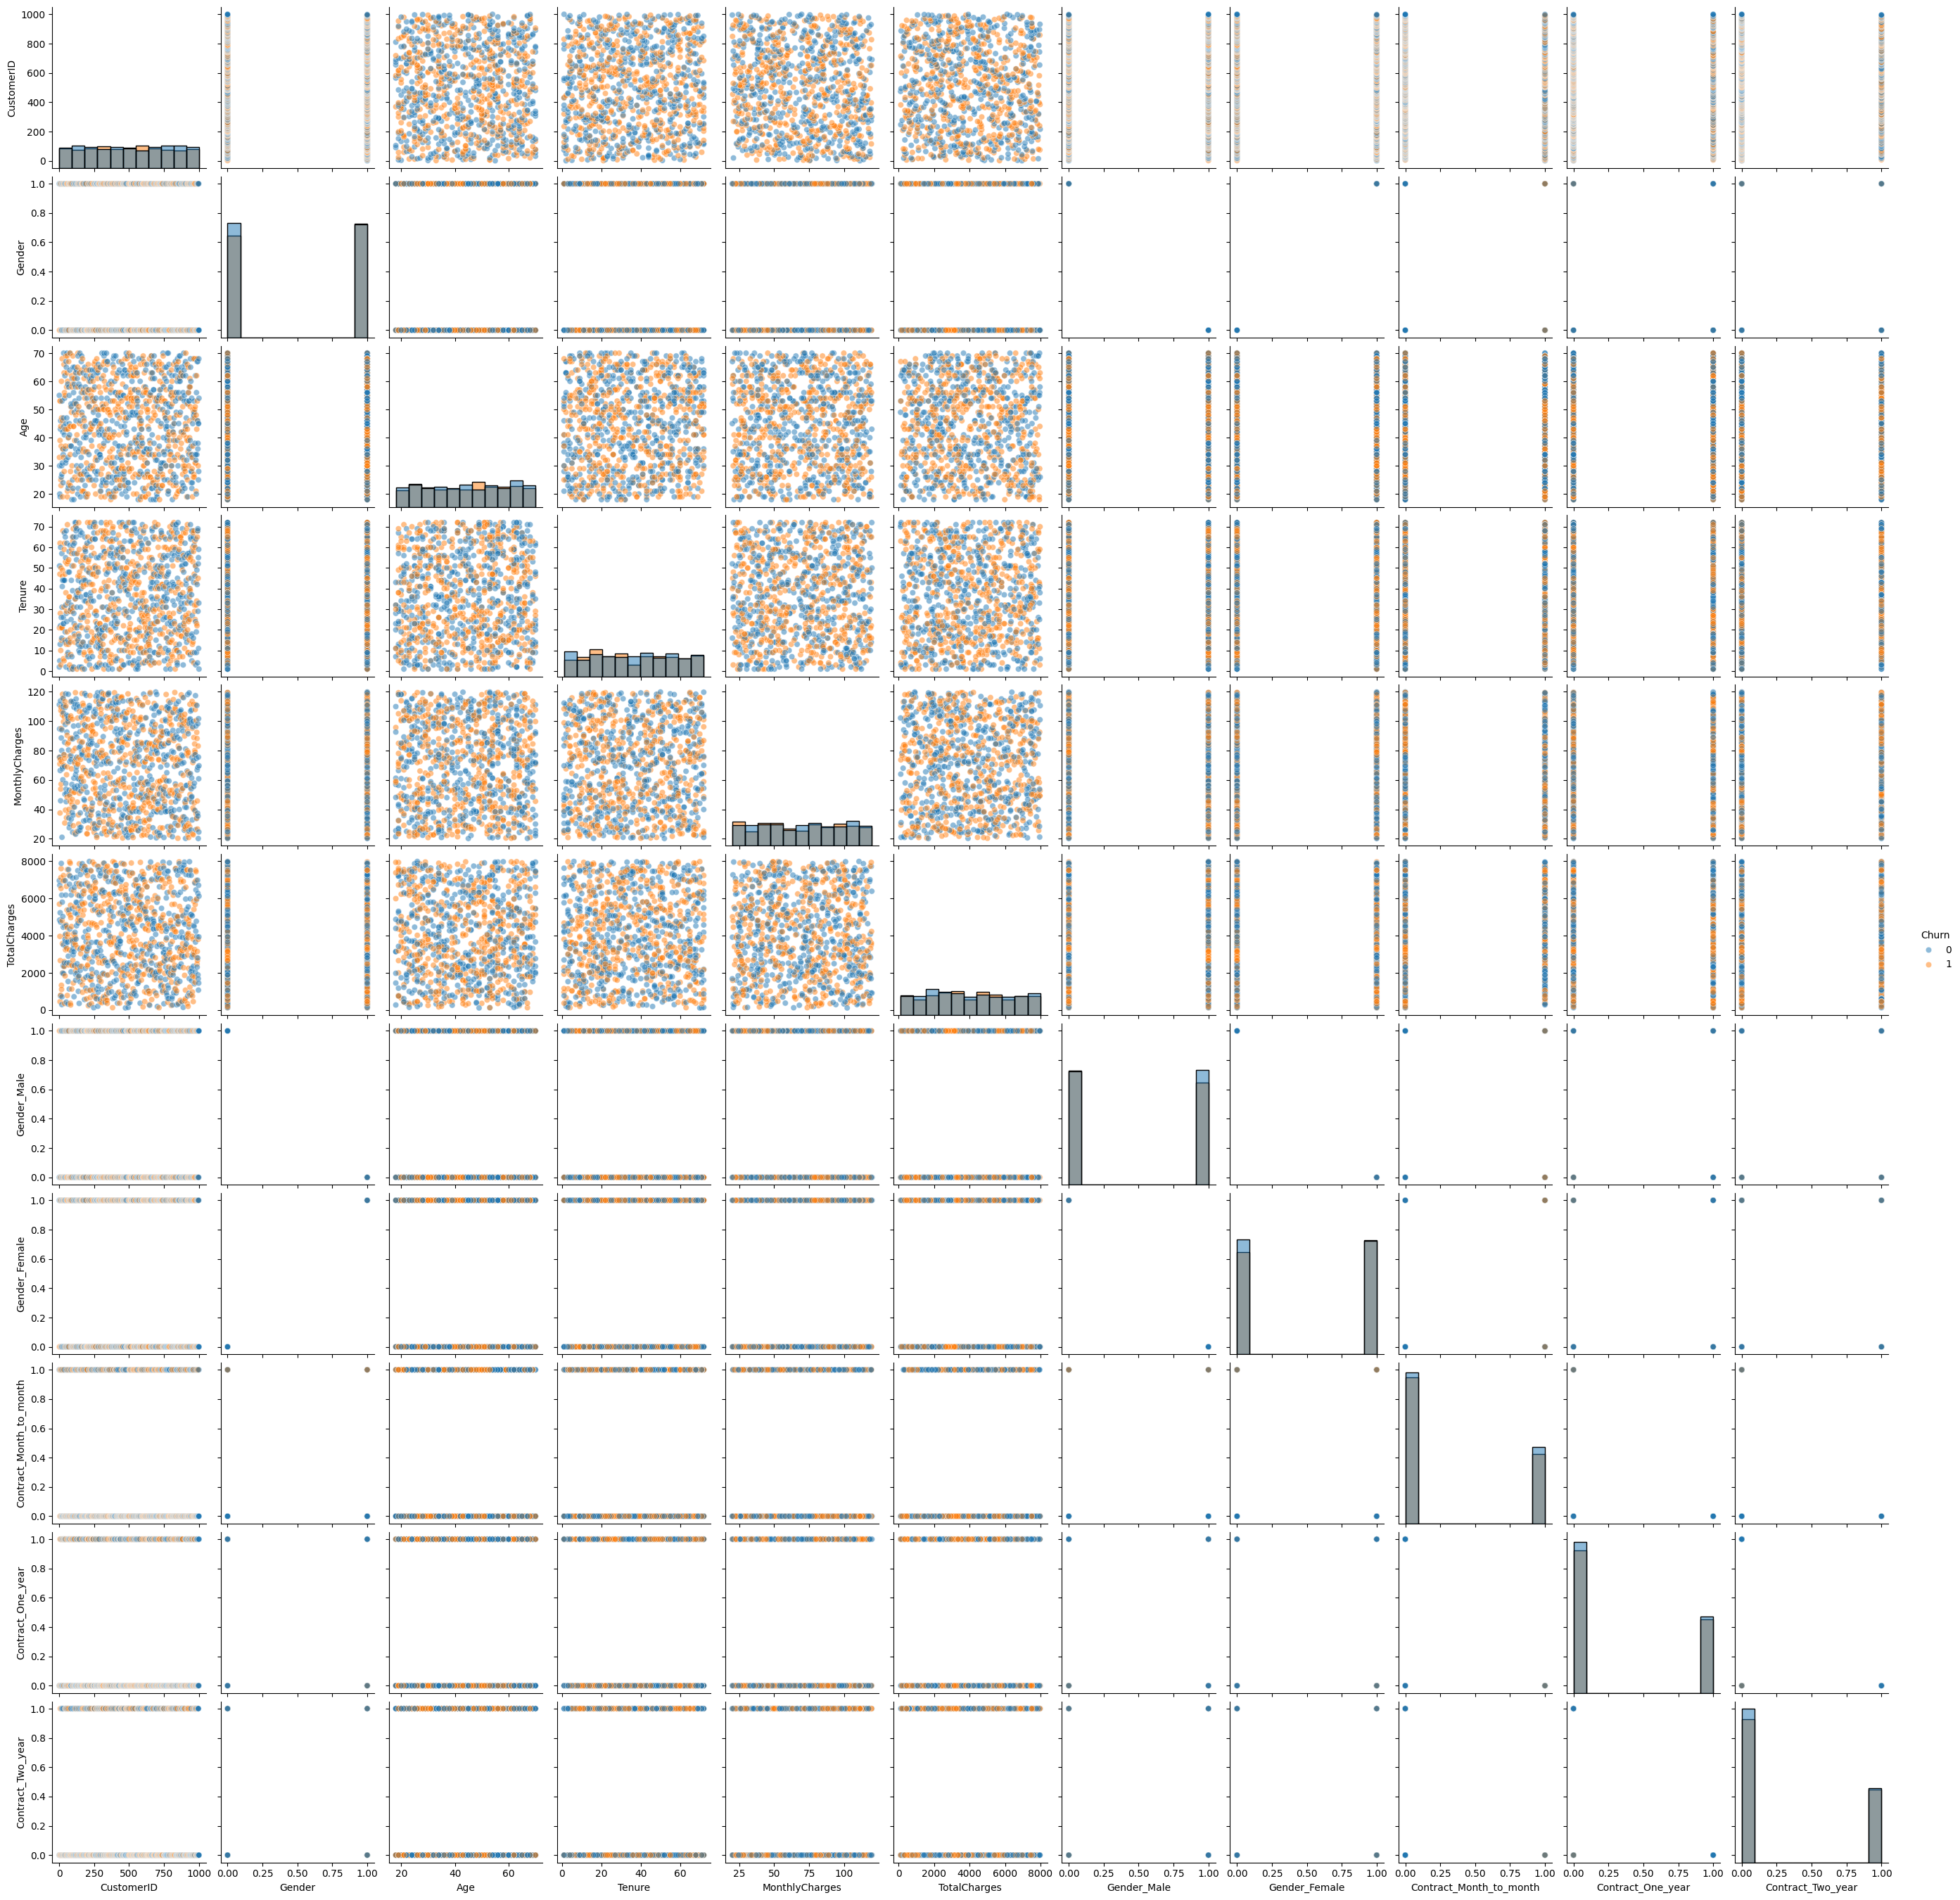

In [27]:
g= sns.pairplot(df,hue = 'Churn', diag_kind= 'hist',
             vars=df.columns[:-1],
             plot_kws=dict(alpha=0.5), 
             diag_kws=dict(alpha=0.5))
plt.show()

In [28]:
df.corr(numeric_only=True)

,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,Gender_Male,Gender_Female,Contract_Month_to_month,Contract_One_year,Contract_Two_year,Churn
CustomerID,1.000000,-0.007041,-0.008477,0.042854,-0.070124,-0.034867,0.007041,-0.007041,-0.019832,-0.026546,0.046521,-0.012028
Gender,-0.007041,1.000000,0.013059,0.037422,0.017919,-0.026089,-1.000000,1.000000,0.008679,-0.015079,0.006496,0.030643
Age,-0.008477,0.013059,1.000000,0.038315,0.000721,-0.024992,-0.013059,0.013059,0.027620,0.048156,-0.076042,-0.010366
Tenure,0.042854,0.037422,0.038315,1.000000,0.019109,0.031735,-0.037422,0.037422,-0.023990,0.008604,0.015316,-0.003566
MonthlyCharges,-0.070124,0.017919,0.000721,0.019109,1.000000,-0.003102,-0.017919,0.017919,-0.019481,0.002218,0.017236,-0.013454
TotalCharges,-0.034867,-0.026089,-0.024992,0.031735,-0.003102,1.000000,0.026089,-0.026089,-0.006415,0.026793,-0.020542,0.007935
Gender_Male,0.007041,-1.000000,-0.013059,-0.037422,-0.017919,0.026089,1.000000,-1.000000,-0.008679,0.015079,-0.006496,-0.030643
Gender_Female,-0.007041,1.000000,0.013059,0.037422,0.017919,-0.026089,-1.000000,1.000000,0.008679,-0.015079,0.006496,0.030643
Contract_Month_to_month,-0.019832,0.008679,0.027620,-0.023990,-0.019481,-0.006415,-0.008679,0.008679,1.000000,-0.502596,-0.493652,-0.015785
Contract_One_year,-0.026546,-0.015079,0.048156,0.008604,0.002218,0.026793,0.015079,-0.015079,-0.502596,1.000000,-0.503733,0.003833


<Axes: >

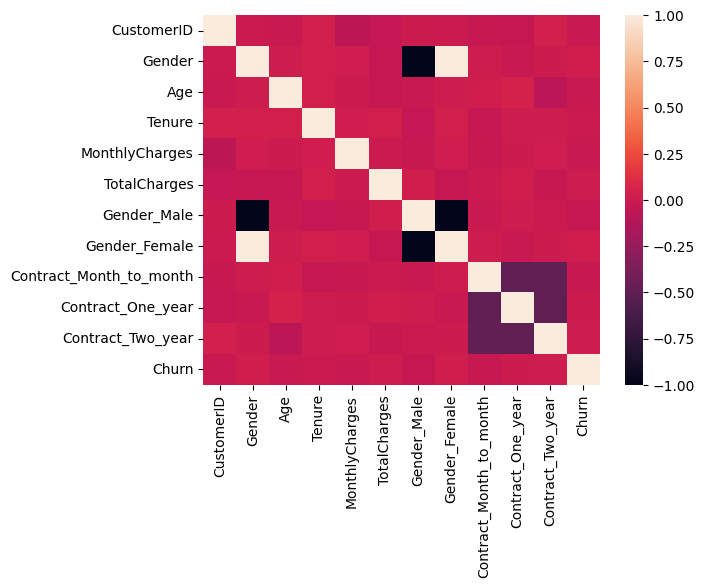

In [29]:
sns.heatmap(df.corr(numeric_only=True))

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest


from sklearn.feature_selection import mutual_info_regression, f_regression

# this function will take in X, y variables 
# with criteria, and return a dataframe
# with most important columns
# based on that criteria
def featureSelect_dataframe(X, y, criteria, k):

    # initialize our function/method
    reg = SelectKBest(criteria, k=k).fit(X,y)
    
    # transform after creating the reg (so we can use getsupport)
    X_transformed = reg.transform(X)

    # filter down X based on kept columns
    X = X[[val for i,val in enumerate(X.columns) if reg.get_support()[i]]]

    return X

cols = list(df.columns)[:-1]

X_train2, X_test2, y_train2, y_test2 = train_test_split(df[cols],df.Churn, test_size=0.2, random_state=99)
New_X = featureSelect_dataframe(X_train2, y_train2, mutual_info_regression, 7)

New_X

,Gender,Age,Tenure,TotalCharges,Contract_Month_to_month,Contract_One_year,Contract_Two_year
211,0,51,54,4688.27,False,True,False
119,1,63,65,3807.06,True,False,False
384,0,63,70,7977.10,False,False,True
80,1,28,30,5631.54,True,False,False
799,1,51,22,2730.05,False,False,True
...,...,...,...,...,...,...,...
713,1,67,4,125.71,False,True,False
168,1,44,55,5680.28,False,True,False
185,1,35,60,4621.25,False,False,True
35,1,28,59,2342.79,False,True,False


In [31]:
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import chi2, f_classif, mutual_info_classif


New_X2 = featureSelect_dataframe(X_train2, y_train2, chi2, 7)

New_X2

,CustomerID,Gender,Tenure,MonthlyCharges,TotalCharges,Gender_Male,Gender_Female
211,212,0,54,62.85,4688.27,True,False
119,120,1,65,91.30,3807.06,False,True
384,385,0,70,52.78,7977.10,True,False
80,81,1,30,88.23,5631.54,False,True
799,800,1,22,40.59,2730.05,False,True
...,...,...,...,...,...,...,...
713,714,1,4,73.66,125.71,False,True
168,169,1,55,112.12,5680.28,False,True
185,186,1,60,101.83,4621.25,False,True
35,36,1,59,102.95,2342.79,False,True


Model

In [32]:
# first selection
# feature_cols = ['Age', 'Tenure', 'MonthlyCharges', 'Gender_Female', 'Contract_Two_year']

# second selection - best set of features
feature_cols = ['Age','Tenure', 'MonthlyCharges', 'Gender_Male', 'Gender_Female']

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


tree_model = DecisionTreeClassifier(random_state=0,max_depth=5)
X = df[feature_cols]
y = df.Churn

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)


In [34]:
tree_model.fit(X_train,y_train)

y_pred=tree_model.predict(X_test)

In [35]:
tree_model.score(X_test,y_test)

0.59

In [36]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print(recall_score(y_pred, y_test))
print(precision_score(y_pred, y_test))
print(f1_score(y_pred, y_test))

0.5070422535211268
0.43373493975903615
0.4675324675324675
